# import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import file

In [3]:
df=pd.read_csv('Datasets/NFL Play by Play 2009-2018 (v5).csv')

C:\Users\SA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


# analyze missing values

In [5]:
missing_value=df.isnull().sum()

In [6]:
missing_value

play_id                               0
game_id                               0
home_team                             0
away_team                             0
posteam                           13242
                                  ...  
penalty_type                     418232
defensive_two_point_attempt       12874
defensive_two_point_conv          12874
defensive_extra_point_attempt     12874
defensive_extra_point_conv        12874
Length: 255, dtype: int64

In [7]:
total_missing_values=missing_value.sum()

In [8]:
total_missing_values

44121484

# percentage of missing values

In [9]:
df.shape

(449371, 255)

In [10]:
total_cells=np.product(df.shape)

In [11]:
total_cells

114589605

In [12]:
percentage_missing_values=total_missing_values/total_cells*100

In [13]:
percentage_missing_values

38.50391490571942

# drop missing values in row

In [14]:
drop_missing_values_in_row=df.dropna(axis=0)

In [15]:
drop_missing_values_in_row

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv


# drop missing values in cols

In [16]:
drop_missing_val_col=df.dropna(axis=1)

In [17]:
drop_missing_val_col

,play_id,game_id,home_team,away_team,game_date,game_half,quarter_end,drive,sp,qtr,...,total_away_pass_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,replay_or_challenge
0,46,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,68,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-0.004655,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0
2,92,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-0.004655,-0.028383,0.028383,0.033038,-0.033038,-0.028383,0.028383,0.033038,-0.033038,0
3,113,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.044921,-0.028383,0.028383,0.033038,-0.033038,0.081542,-0.081542,-0.126463,0.126463,0
4,139,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.044921,-0.028383,0.028383,0.033038,-0.033038,0.081542,-0.081542,-0.126463,0.126463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,2018-12-17,Half2,0,20,0,4,...,-0.002008,0.160273,-0.160273,-0.031557,0.031557,0.166989,-0.166989,-0.076056,0.076056,0
449367,4081,2018121700,CAR,NO,2018-12-17,Half2,0,20,0,4,...,0.040273,0.136973,-0.136973,-0.050537,0.050537,0.143688,-0.143688,-0.095037,0.095037,0
449368,4106,2018121700,CAR,NO,2018-12-17,Half2,0,20,0,4,...,0.045730,0.136973,-0.136973,-0.050537,0.050537,0.123381,-0.123381,-0.080187,0.080187,0
449369,4128,2018121700,CAR,NO,2018-12-17,Half2,0,21,0,4,...,0.045730,0.136973,-0.136973,-0.050537,0.050537,0.123381,-0.123381,-0.080187,0.080187,0


In [18]:
drop_missing_val_col.isnull().sum()

play_id                      0
game_id                      0
home_team                    0
away_team                    0
game_date                    0
game_half                    0
quarter_end                  0
drive                        0
sp                           0
qtr                          0
ydstogo                      0
ydsnet                       0
shotgun                      0
no_huddle                    0
qb_kneel                     0
qb_spike                     0
qb_scramble                  0
home_timeouts_remaining      0
away_timeouts_remaining      0
total_home_score             0
total_away_score             0
extra_point_prob             0
two_point_conversion_prob    0
total_home_epa               0
total_away_epa               0
total_home_rush_epa          0
total_away_rush_epa          0
total_home_pass_epa          0
total_away_pass_epa          0
total_home_comp_air_epa      0
total_away_comp_air_epa      0
total_home_comp_yac_epa      0
total_aw

# fill missing values

In [19]:
df.fillna(method='ffill',axis=0)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,00-0033357,T.Hill,10.0,0,upheld,Offensive Holding,0.0,0.0,0.0,0.0
449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,2018-12-17,...,00-0033357,T.Hill,10.0,0,upheld,Offensive Holding,0.0,0.0,0.0,0.0
449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,2018-12-17,...,00-0033357,T.Hill,10.0,0,upheld,Offensive Holding,0.0,0.0,0.0,0.0
449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,2018-12-17,...,00-0033357,T.Hill,10.0,0,upheld,Offensive Holding,0.0,0.0,0.0,0.0



# scaling vs normalization

# minmax scaling through scikit library

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [18]:
data=np.random.exponential(size=200)

In [19]:
data

array([1.02834871e+00, 3.47777827e-01, 6.01322347e-01, 6.46180148e-01,
       1.16584535e+00, 5.31294543e-01, 4.25450798e-01, 2.54934713e+00,
       9.23520633e-01, 2.81576441e-01, 1.10180185e+00, 2.53054288e+00,
       1.69165386e+00, 2.50917385e-02, 4.15662635e-02, 1.48573734e+00,
       1.48107643e+00, 9.19763963e-01, 3.82844646e-02, 8.76890119e-01,
       8.70526992e-01, 1.88838462e+00, 2.27202435e+00, 1.55156247e+00,
       3.99229618e-02, 1.04268603e+00, 2.23188507e+00, 3.06418558e-01,
       9.37133967e-01, 3.12663905e+00, 6.62421438e-01, 3.26268898e-01,
       6.54220371e-01, 2.72462487e+00, 2.68580650e+00, 7.82108341e-01,
       1.65693254e+00, 6.93450161e-01, 4.42489002e-01, 8.33706118e-01,
       1.01411024e-01, 2.12363794e-01, 1.78540288e+00, 1.39780246e+00,
       1.62081491e+00, 2.62587949e-01, 1.38976674e+00, 1.12243102e+00,
       1.46627391e-01, 6.16976258e-02, 6.88986757e-01, 6.54959741e-01,
       1.98819904e+00, 4.19156019e-03, 6.53919672e-01, 1.40222057e+00,
      

In [20]:
data.shape

(200,)

In [21]:
data=data.reshape(-1,1)

In [22]:

data.shape

(200, 1)

In [23]:
scaler.fit(data)

MinMaxScaler()

In [31]:
scale_data=scaler.fit_transform(data)

In [27]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 554.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [30]:
np.random.seed(0)

# visualization original data and after scaling

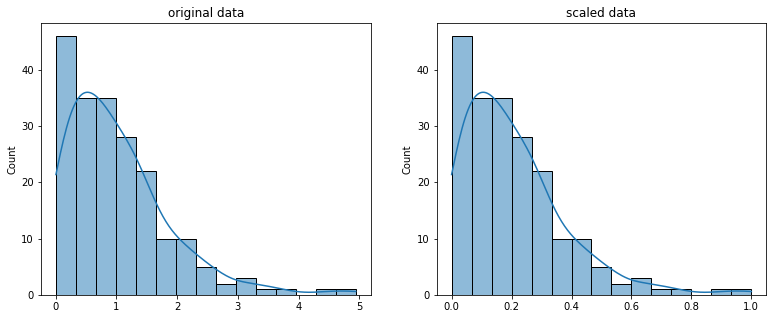

In [36]:
fig,ax=plt.subplots(1,2,figsize=(13,5))

sns.histplot(data,ax=ax[0],kde=True,legend=False)
ax[0].set_title("original data")

sns.histplot(scale_data,ax=ax[1],kde=True,legend=False)
ax[1].set_title('scaled data')
plt.show()


# here we can see that the shape of both the data does not change except the range 
# so,in order to change the shape of the data we will do normalization

# ----------------------------------------------------------------------------

# normalization

In [37]:
from scipy import stats

In [39]:
data.shape

(200, 1)

In [40]:
data.ndim

2

# for normaliztion data must be in one dimension form

In [45]:
conv_to_oneDimen=data.reshape(-1)

In [46]:
conv_to_oneDimen.shape

(200,)

In [47]:
normalized_data=stats.boxcox(conv_to_oneDimen)

# visualization

C:\Users\SA\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


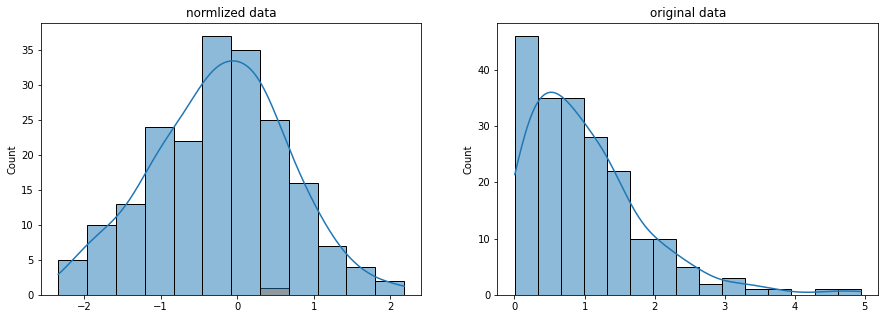

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(normalized_data,kde=True,legend=False,ax=ax[0])
ax[0].set_title('normlized data')

sns.histplot(data,kde=True,legend=False,ax=ax[1])
ax[1].set_title('original data')
plt.show()
